In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el archivo NPY
intervals = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_1601.npy')
intervals_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/intervals_ref_1601.npy')
labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_1601.npy')
labels_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/labels_ref_1601.npy')
test_intervals_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_intervals_1601.npy')
test_labels_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/test_labels_1601.npy')
x_out_1601 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_1601.npy')
x_out_1601_ref = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_ref_1601.npy')
x_out_1601_test = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/datasets/medidas_2d/1601/X_out_test_1601.npy')

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\1855633445.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Crear un DataFrame
df = pd.DataFrame({
    'intervals': intervals,   # Asumimos que 'intervals' está previamente cargado
    'labels_1601': labels_1601  # Asumimos que 'labels_1601' está previamente cargado
})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_train_a_position = np.array(positions_by_category, dtype=object)
x_train_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_train_a_position = [item for sublist in x_train_a_position for item in sublist]
indices_x_train_b_position = [item for sublist in x_train_b_position for item in sublist]


C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\961988873.py:8: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\961988873.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [3]:
import pandas as pd
import numpy as np

# Crear un DataFrame
df = pd.DataFrame({
    'intervals': intervals,   # Asumimos que 'intervals' está previamente cargado
    'labels_1601': labels_1601  # Asumimos que 'labels_1601' está previamente cargado
})

# Combinar 'intervals' y 'labels_1601' en una columna y factorizar para asignar un identificador único
df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted = [sorted(positions, reverse=True) for positions in positions_by_category]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
x_train_a_position = np.array(positions_by_category, dtype=object)
x_train_b_position = np.array(positions_by_category_sorted, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_x_train_a_position = [item for sublist in x_train_a_position for item in sublist]
indices_x_train_b_position = [item for sublist in x_train_b_position for item in sublist]


C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\3632705751.py:11: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\3632705751.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category = df.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [4]:
df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]

C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\2544489754.py:1: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df['category'] = pd.factorize(list(zip(df['intervals'], df['labels_1601'])))[0]


In [5]:
# Crear un DataFrame
df_2 = pd.DataFrame({
    'test_intervals_1601': test_intervals_1601,
    'test_labels_1601': test_labels_1601
})

# Combinar 'test_intervals_1601' y 'test_labels_1601' en una columna y factorizar para asignar un identificador único
df_2['category'] = pd.factorize(list(zip(df_2['test_intervals_1601'], df_2['test_labels_1601'])))[0]

# Usar groupby para agrupar por categoría y recoger los índices en listas
positions_by_category_y = df_2.groupby('category').apply(lambda x: x.index.tolist()).tolist()

# Ordenar cada lista de posiciones de forma descendente
positions_by_category_sorted_y = [sorted(positions, reverse=True) for positions in positions_by_category_y]

# Convertir la lista de listas en un array de numpy con dtype=object para manejar listas de diferentes longitudes
y_test_a_position = np.array(positions_by_category_y, dtype=object)
y_test_b_position = np.array(positions_by_category_sorted_y, dtype=object)

# Opcionalmente, aplana las listas si es necesario para alguna otra operación
indices_y_test_a_position = [item for sublist in y_test_a_position for item in sublist]
indices_y_test_b_position = [item for sublist in y_test_b_position for item in sublist]


C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\27982179.py:8: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  df_2['category'] = pd.factorize(list(zip(df_2['test_intervals_1601'], df_2['test_labels_1601'])))[0]
C:\Users\TSE LATAM\AppData\Local\Temp\ipykernel_10940\27982179.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  positions_by_category_y = df_2.groupby('category').apply(lambda x: x.index.tolist()).tolist()


In [6]:
# Reordenar los datasets según los índices proporcionados
x_train = x_out_1601[indices_x_train_a_position]
x_train_b = x_out_1601[indices_x_train_b_position]
x_test = x_out_1601_test[indices_y_test_a_position]
x_test_b = x_out_1601_test[indices_y_test_b_position]

# Recortar un píxel de la parte superior de cada imagen en todos los datasets
x_train = x_train[:, 1:1601, :, :]
x_train_b = x_train_b[:, 1:1601, :, :]
x_test = x_test[:, 1:1601, :, :]
x_test_b = x_test_b[:, 1:1601, :, :]

In [7]:
x_train_b_2 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/selected_array.npy')
x_test_b_2 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/selected_array_test.npy')
x_train_b_2 = x_train_b_2[:, 1:1601, :, :]
x_test_b_2 = x_test_b_2[:, 1:1601, :, :]

In [8]:
x_out_1601 = x_out_1601[:, 1:1601, :, :]
x_out_1601_test = x_out_1601_test[:, 1:1601, :, :]

In [9]:
# Imprimir el shape de cada variable
print("x_train shape:", x_train.shape)
print("x_train_b shape:", x_train_b.shape)
print("x_test shape:", x_test.shape)
print("x_test_b shape:", x_test_b.shape)
print("x_train_b_2 shape:", x_train_b_2.shape)
print("x_test_b_2 shape:", x_test_b_2.shape)
print("x_out_1601 shape:", x_out_1601.shape)
print("x_out_1601_test shape:", x_out_1601_test.shape)

x_train shape: (4800, 1600, 128, 1)
x_train_b shape: (4800, 1600, 128, 1)
x_test shape: (2400, 1600, 128, 1)
x_test_b shape: (2400, 1600, 128, 1)
x_train_b_2 shape: (4800, 1600, 128, 1)
x_test_b_2 shape: (2400, 1600, 128, 1)
x_out_1601 shape: (4800, 1600, 128, 1)
x_out_1601_test shape: (2400, 1600, 128, 1)


In [10]:
x_combined = np.concatenate((x_train, x_out_1601), axis=0)
y_combined = np.concatenate((x_train_b, x_train_b_2), axis=0)

In [11]:
x_combined_test = np.concatenate((x_test, x_out_1601_test), axis=0)
y_combined_test = np.concatenate((x_test_b, x_test_b_2), axis=0)

In [12]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.models import Model

def build_autoencoder():
    # Define la entrada con el nuevo tamaño de imagen
    input_img = Input(shape=(1600, 128, 1))

    # Encoder
    x = Conv2D(32, (3, 3), padding='same')(input_img)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = LeakyReLU(alpha=0.1)(x)
    x = BatchNormalization()(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')

    return autoencoder

# Construir el modelo
autoencoder = build_autoencoder()
autoencoder.summary()


c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 1600, 128, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 1600, 128, 32)  │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 1600, 128, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1600, 128, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 800, 64, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 800, 64, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 800, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 800, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 400, 32, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 400, 32, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 400, 32, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 200, 16, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 400, 32, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 400, 32, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 400, 32, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 800, 64, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 800, 64, 64)    │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 800, 64, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 800, 64, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 1600, 128, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 334,593 (1.28 MB)

 Trainable params: 333,697 (1.27 MB)

 Non-trainable params: 896 (3.50 KB)

In [13]:
x_combined = x_combined.astype('float32') / 255.0
y_combined = y_combined.astype('float32') / 255.0
x_combined_test = x_combined_test.astype('float32') / 255.0
y_combined_test = y_combined_test.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_test_b = x_test_b.astype('float32') / 255.0

In [14]:
'''
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model

# Configuración del entrenamiento del autoencoder
callbacks = [
    ModelCheckpoint('autoencoder_best_data_combined_N2N_N2C.keras', verbose=1, save_best_only=True, save_weights_only=False),
    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001, verbose=1)
]

history = autoencoder.fit(
    x=x_combined,
    y=y_combined,
    epochs=25,
    batch_size=32,
    shuffle=True,
    validation_data=(x_combined_test, y_combined_test),
    callbacks=callbacks
)

# Evaluación del modelo en el conjunto de prueba
test_loss = autoencoder.evaluate(x_test, x_test_b)
print("Test loss (MSE):", test_loss)

# Plotting training and validation losses
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
'''

'\nimport matplotlib.pyplot as plt\nfrom tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau\nfrom tensorflow.keras.models import load_model\n\n# Configuración del entrenamiento del autoencoder\ncallbacks = [\n    ModelCheckpoint(\'autoencoder_best_data_combined_N2N_N2C.keras\', verbose=1, save_best_only=True, save_weights_only=False),\n    ReduceLROnPlateau(factor=0.5, patience=5, min_lr=0.00001, verbose=1)\n]\n\nhistory = autoencoder.fit(\n    x=x_combined,\n    y=y_combined,\n    epochs=25,\n    batch_size=32,\n    shuffle=True,\n    validation_data=(x_combined_test, y_combined_test),\n    callbacks=callbacks\n)\n\n# Evaluación del modelo en el conjunto de prueba\ntest_loss = autoencoder.evaluate(x_test, x_test_b)\nprint("Test loss (MSE):", test_loss)\n\n# Plotting training and validation losses\nplt.figure()\nplt.plot(history.history[\'loss\'], label=\'Training Loss\')\nplt.plot(history.history[\'val_loss\'], label=\'Validation Loss\')\nplt.title(\'Training and Val

In [15]:
'''
decoded_imgs = autoencoder.predict(x_test)
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(1600, 128), cmap='gray')
    plt.title("Original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(1600, 128), cmap='gray')
    plt.title("Reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
'''

'\ndecoded_imgs = autoencoder.predict(x_test)\nn = 5\nplt.figure(figsize=(20, 4))\nfor i in range(n):\n    # Display original\n    ax = plt.subplot(2, n, i + 1)\n    plt.imshow(x_test[i].reshape(1600, 128), cmap=\'gray\')\n    plt.title("Original")\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\n\n    # Display reconstruction\n    ax = plt.subplot(2, n, i + 1 + n)\n    plt.imshow(decoded_imgs[i].reshape(1600, 128), cmap=\'gray\')\n    plt.title("Reconstructed")\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\nplt.show()\n'

**Probaremos el clasificador con la nueva data**

In [16]:
selected_labels_train = labels_1601[indices_x_train_b_position]
selected_labels_train_2 = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/selected_labels_array.npy')
labels_combined_train = np.concatenate((selected_labels_train, selected_labels_train_2), axis=0)
x_out_1601_test = x_out_1601_test.astype('float32') / 255.0

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.1684 - loss: 2.5947 - val_accuracy: 0.7254 - val_loss: 1.1882
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.6215 - loss: 1.1937 - val_accuracy: 0.8700 - val_loss: 0.5864
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 32s 107ms/step - accuracy: 0.7908 - loss: 0.6886 - val_accuracy: 0.8629 - val_loss: 0.5510
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.8589 - loss: 0.4987 - val_accuracy: 0.8646 - val_loss: 0.5389
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 30s 101ms/step - accuracy: 0.8842 - loss: 0.4006 - val_accuracy: 0.8700 - val_loss: 0.5682
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.9080 - loss: 0.3221 - val_accuracy: 0.8746 - val_loss: 0.5672
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 31s 102ms/step - accuracy: 0.9128 - loss: 0.3044 - val_accuracy: 0.8742 - val_loss: 0.5731
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.9242 - lo

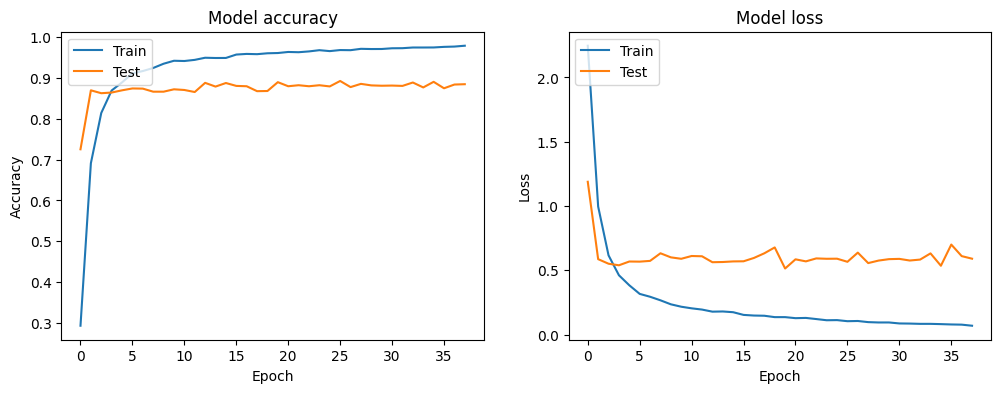

75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step


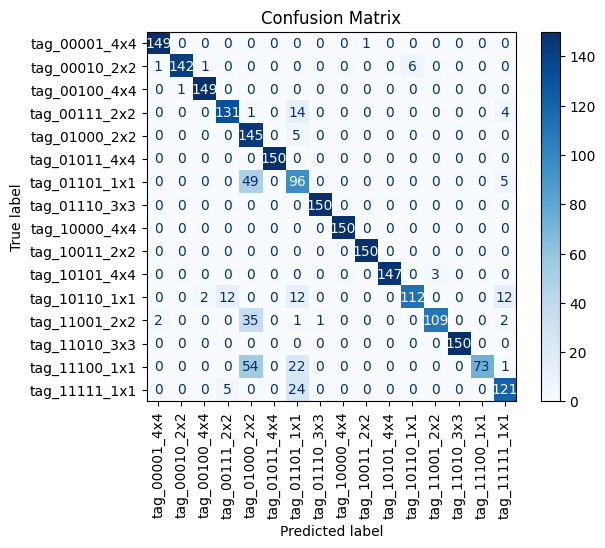

Exactitud del modelo: 88.50%
Tasa de errores: 11.50%


In [17]:
import tensorflow as tf
from functools import partial
import tensorflow as tf
from functools import partial
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Convert string labels to numerical labels
label_encoder = LabelEncoder()
labels_1601_categorical = label_encoder.fit_transform(labels_combined_train)
labels_1601_categorical_test = label_encoder.transform(test_labels_1601)

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(y_combined, labels_1601_categorical, epochs=100, validation_data=(x_out_1601_test, labels_1601_categorical_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(x_out_1601_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_1601_categorical_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

**Evaluacion por Intervalos**

In [18]:
selected_intervals_train = np.load('C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/selected_intervals_array.npy')

In [19]:
selected_intervals_train = np.where(selected_intervals_train == '000_020', '050_080', selected_intervals_train)
selected_intervals_train = np.where(selected_intervals_train == '000_050', '050_080', selected_intervals_train)
selected_intervals_train = np.where(selected_intervals_train == '000_080', '080_110', selected_intervals_train)
selected_intervals_train = np.where(selected_intervals_train == '000_110', '080_110', selected_intervals_train)
selected_intervals_train = np.where(selected_intervals_train == '000_140', '110_140', selected_intervals_train)

In [20]:
intervals_combined = np.concatenate((intervals[indices_x_train_b_position], selected_intervals_train), axis=0)

**Train**

In [21]:
positions_050_080 = np.where(intervals_combined == "050_080")[0]
positions_080_110 = np.where(intervals_combined == "080_110")[0]
positions_110_140 = np.where(intervals_combined == "110_140")[0]

In [22]:
# generamos los conjuntos de datos filtrados para cada intervalo 050_080 
filtered_x_out_1601_050_080 = y_combined[positions_050_080]
filtered_label_050_080 = labels_1601_categorical[positions_050_080]

# generamos los conjuntos de datos filtrados para cada intervalo 080_110
filtered_x_out_1601_080_110 = y_combined[positions_080_110]
filtered_label_080_110 = labels_1601_categorical[positions_080_110]

# generamos los conjuntos de datos filtrados para cada intervalo 110_140
filtered_x_out_1601_110_140 = y_combined[positions_110_140]
filtered_label_110_140 = labels_1601_categorical[positions_110_140]

**Test**

In [23]:
positions_test_050_080 = np.where(test_intervals_1601 == "050_080")[0]
positions_test_080_110 = np.where(test_intervals_1601 == "080_110")[0]
positions_test_110_140 = np.where(test_intervals_1601 == "110_140")[0]

In [24]:
# generamos los conjuntos de datos filtrados para cada intervalo 050_080 
filtered_x_out_1601_050_080_test = x_out_1601_test[positions_test_050_080]
filtered_label_050_080_test = labels_1601_categorical_test[positions_test_050_080]

# generamos los conjuntos de datos filtrados para cada intervalo 080_110
filtered_x_out_1601_080_110_test = x_out_1601_test[positions_test_080_110]
filtered_label_080_110_test = labels_1601_categorical_test[positions_test_080_110]

# generamos los conjuntos de datos filtrados para cada intervalo 110_140
filtered_x_out_1601_110_140_test = x_out_1601_test[positions_test_110_140]
filtered_label_110_140_test = labels_1601_categorical_test[positions_test_110_140]

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - accuracy: 0.0583 - loss: 2.7714 - val_accuracy: 0.0575 - val_loss: 2.7690
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.0769 - loss: 2.7653 - val_accuracy: 0.0712 - val_loss: 2.7681
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.0855 - loss: 2.7552 - val_accuracy: 0.0775 - val_loss: 2.7675
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 110ms/step - accuracy: 0.0960 - loss: 2.7519 - val_accuracy: 0.0625 - val_loss: 2.7675
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.0921 - loss: 2.7504 - val_accuracy: 0.0625 - val_loss: 2.7684
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.1150 - loss: 2.7382 - val_accuracy: 0.0613 - val_loss: 2.7674
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.1105 - loss: 2.7357 - val_accuracy: 0.0613 - val_loss: 2.7689
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.1033 - loss: 2.7316 - val_accura

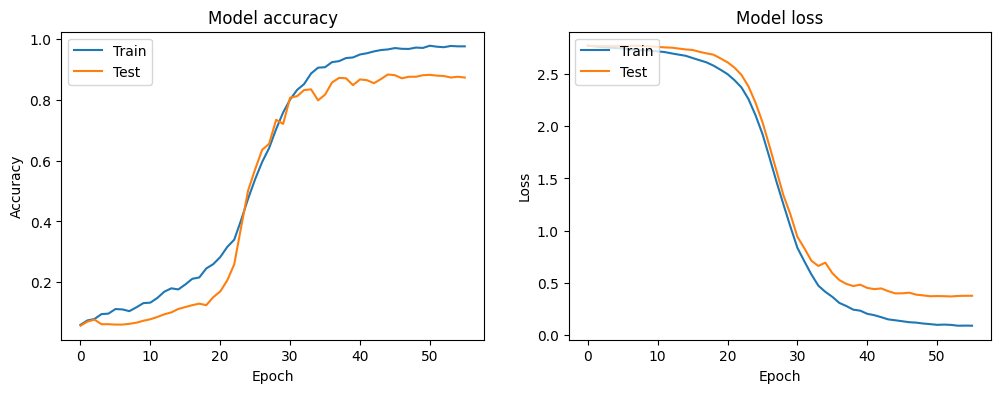

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


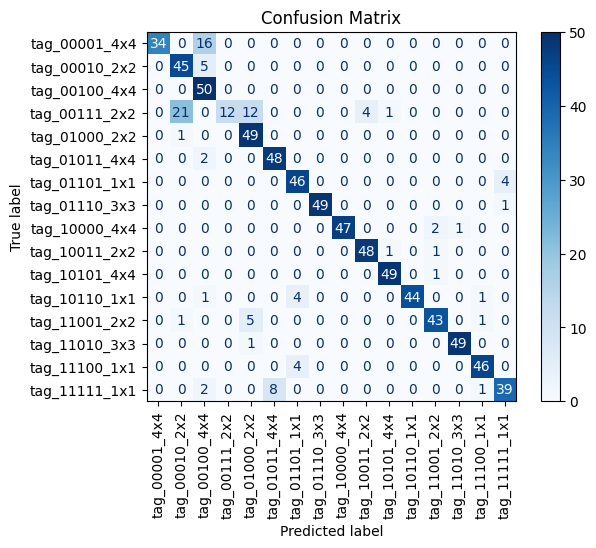

Exactitud del modelo: 87.25%
Tasa de errores: 12.75%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


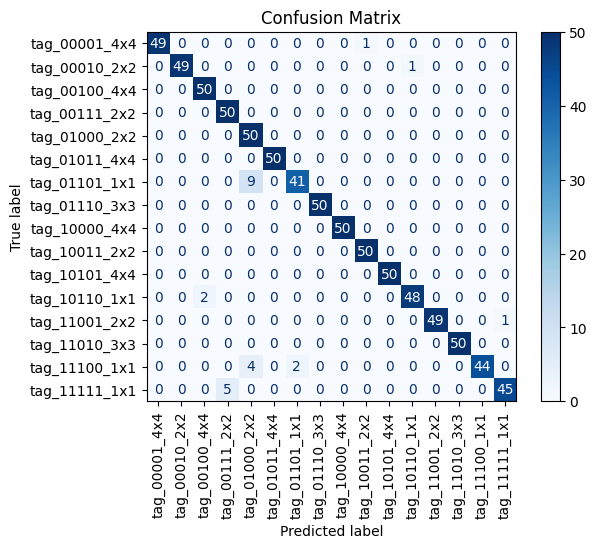

Exactitud del modelo: 96.88%
Tasa de errores: 3.12%


In [25]:
import tensorflow as tf
from functools import partial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model_classifier_interval = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model_classifier_interval.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model_classifier_interval.fit(filtered_x_out_1601_050_080, filtered_label_050_080, epochs=100, 
                    validation_data=(filtered_x_out_1601_050_080_test, filtered_label_050_080_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model_classifier_interval.predict(filtered_x_out_1601_050_080_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(filtered_label_050_080_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix
y_pred = model.predict(filtered_x_out_1601_050_080_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(filtered_label_050_080_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 18s 131ms/step - accuracy: 0.0605 - loss: 2.7733 - val_accuracy: 0.0662 - val_loss: 2.7681
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 129ms/step - accuracy: 0.0637 - loss: 2.7664 - val_accuracy: 0.0737 - val_loss: 2.7630
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.1026 - loss: 2.7595 - val_accuracy: 0.0812 - val_loss: 2.7574
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.1170 - loss: 2.7515 - val_accuracy: 0.0913 - val_loss: 2.7516
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.1454 - loss: 2.7426 - val_accuracy: 0.1063 - val_loss: 2.7447
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.1560 - loss: 2.7359 - val_accuracy: 0.1112 - val_loss: 2.7376
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.1711 - loss: 2.7201 - val_accuracy: 0.1025 - val_loss: 2.7282
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.1736 -

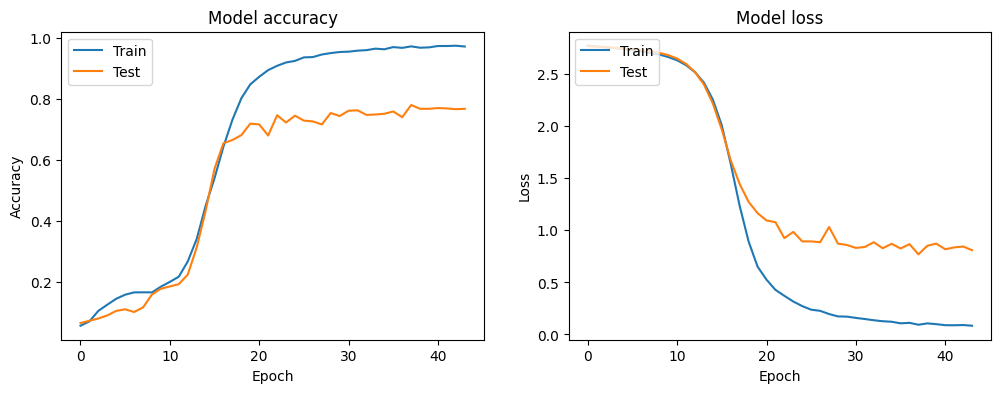

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


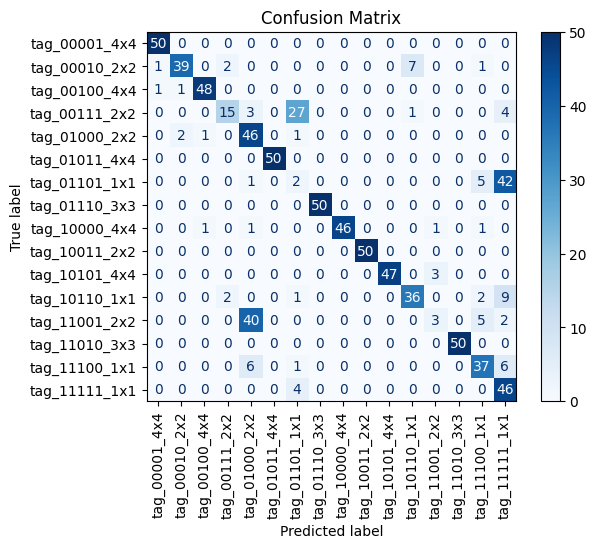

Exactitud del modelo: 76.88%
Tasa de errores: 23.12%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


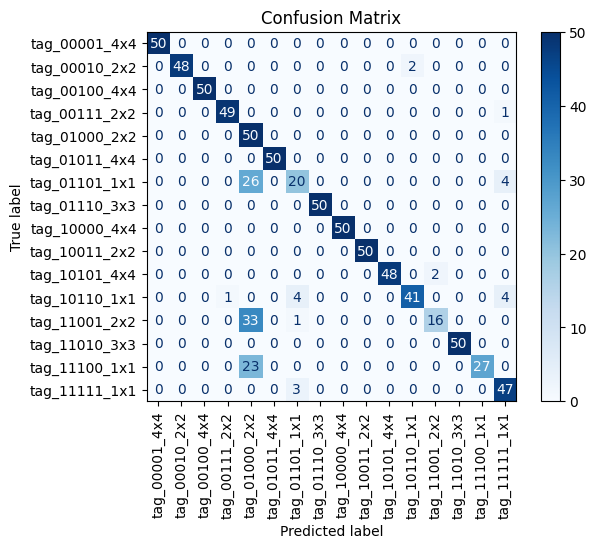

Exactitud del modelo: 87.00%
Tasa de errores: 13.00%


In [26]:
import tensorflow as tf
from functools import partial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model_classifier_interval = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model_classifier_interval.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model_classifier_interval.fit(filtered_x_out_1601_080_110, filtered_label_080_110, epochs=100, 
                    validation_data=(filtered_x_out_1601_080_110_test, filtered_label_080_110_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model_classifier_interval.predict(filtered_x_out_1601_080_110_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(filtered_label_080_110_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix
y_pred = model.predict(filtered_x_out_1601_080_110_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(filtered_label_080_110_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.0572 - loss: 2.7708 - val_accuracy: 0.0587 - val_loss: 2.7700
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 116ms/step - accuracy: 0.0795 - loss: 2.7650 - val_accuracy: 0.0750 - val_loss: 2.7681
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.1037 - loss: 2.7543 - val_accuracy: 0.0812 - val_loss: 2.7671
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.1029 - loss: 2.7479 - val_accuracy: 0.0650 - val_loss: 2.7674
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.1074 - loss: 2.7379 - val_accuracy: 0.0625 - val_loss: 2.7682
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.1206 - loss: 2.7176 - val_accuracy: 0.0625 - val_loss: 2.7693
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.1229 - loss: 2.7101 - val_accuracy: 0.0625 - val_loss: 2.7672
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.1385 - loss: 2.6955 - 

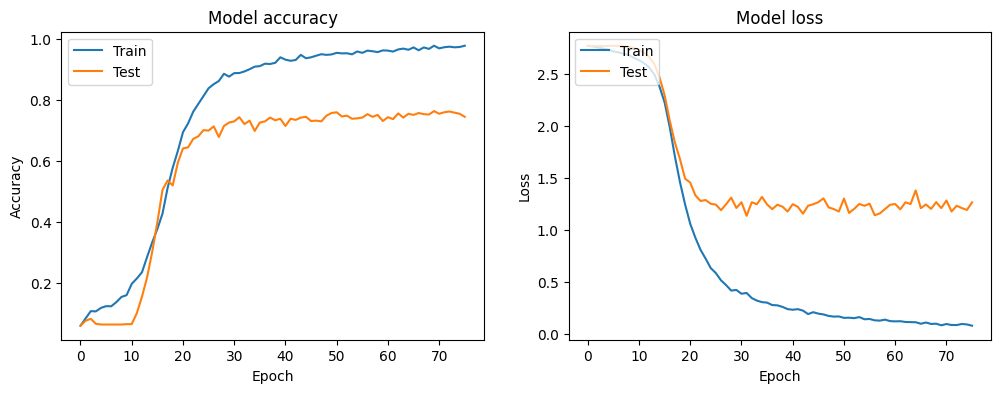

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


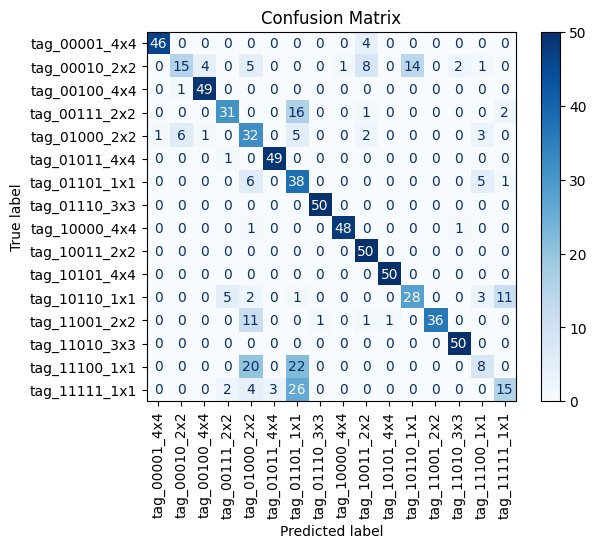

Exactitud del modelo: 74.38%
Tasa de errores: 25.62%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


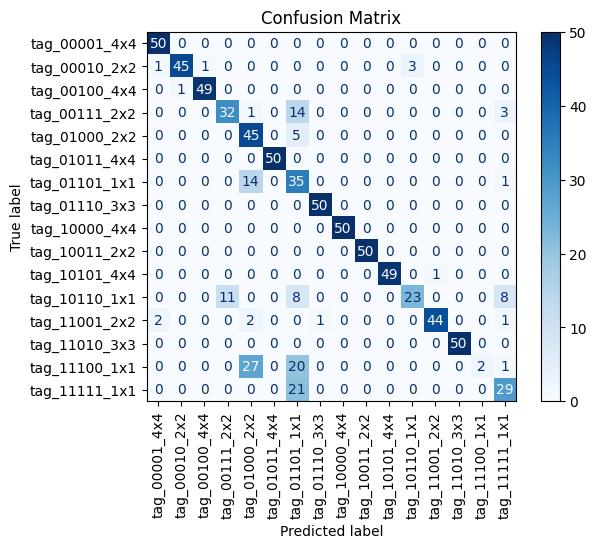

Exactitud del modelo: 81.62%
Tasa de errores: 18.37%


In [27]:
import tensorflow as tf
from functools import partial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model_classifier_interval = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model_classifier_interval.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model_classifier_interval.fit(filtered_x_out_1601_110_140, filtered_label_110_140, epochs=100, 
                    validation_data=(filtered_x_out_1601_110_140_test, filtered_label_110_140_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model_classifier_interval.predict(filtered_x_out_1601_110_140_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(filtered_label_110_140_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix
y_pred = model.predict(filtered_x_out_1601_110_140_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(filtered_label_110_140_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

**Reconstruccion con Autoencoder**

In [28]:
import numpy as np
import keras
from keras.models import load_model

x_out_1601 = x_out_1601.astype('float32') / 255.0
# x_out_1601_test = x_out_1601_test.astype('float32') / 255.0 # Se normalizo en la celda anterior

# Cargar el modelo
model_path = "C:/Users/TSE LATAM/Documents/Navarra/TFM/notebooks_2/autoencoder_best_data_combined_N2N_N2C.keras"
model = load_model(model_path)

# Predecir usando el modelo cargado
predictions_train = model.predict(y_combined)
predictions_test = model.predict(x_out_1601_test)


300/300 ━━━━━━━━━━━━━━━━━━━━ 1008s 3s/step
75/75 ━━━━━━━━━━━━━━━━━━━━ 266s 3s/step


c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.0943 - loss: 2.7315 - val_accuracy: 0.5908 - val_loss: 2.1990
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 34s 112ms/step - accuracy: 0.3858 - loss: 1.9705 - val_accuracy: 0.8171 - val_loss: 0.9706
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 36s 121ms/step - accuracy: 0.6486 - loss: 1.1278 - val_accuracy: 0.8404 - val_loss: 0.6983
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 123ms/step - accuracy: 0.7480 - loss: 0.8161 - val_accuracy: 0.8525 - val_loss: 0.6115
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 37s 124ms/step - accuracy: 0.8085 - loss: 0.6463 - val_accuracy: 0.8562 - val_loss: 0.5815
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 41s 136ms/step - accuracy: 0.8344 - loss: 0.5446 - val_accuracy: 0.8708 - val_loss: 0.5251
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 40s 132ms/step - accuracy: 0.8659 - loss: 0.4509 - val_accuracy: 0.8583 - val_loss: 0.5721
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 39s 130ms/step - accuracy: 0.8839 -

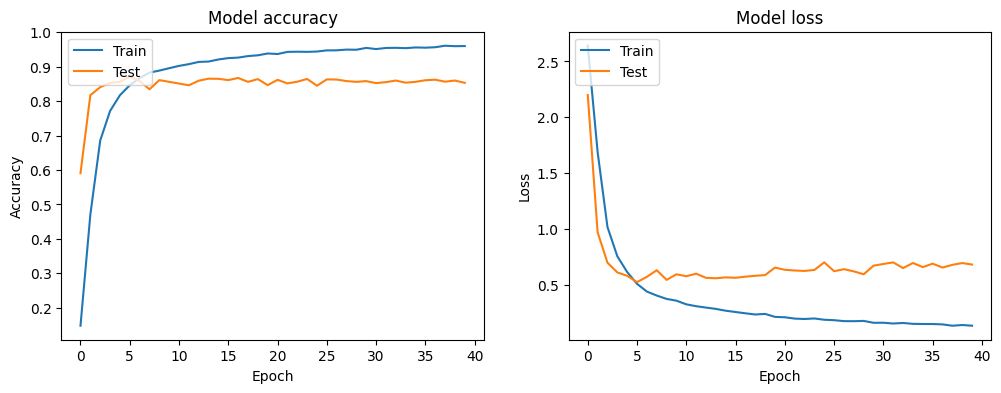

75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step


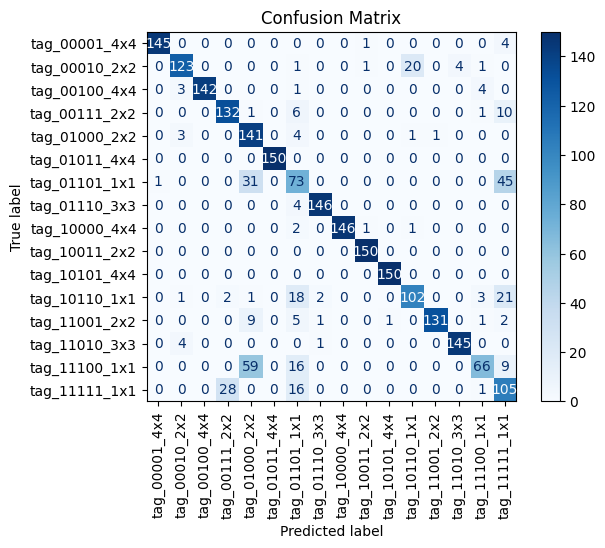

Exactitud del modelo: 85.29%
Tasa de errores: 14.71%


In [29]:
import tensorflow as tf
from functools import partial
import tensorflow as tf
from functools import partial
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Convert string labels to numerical labels
label_encoder = LabelEncoder()
labels_1601_categorical = label_encoder.fit_transform(labels_combined_train)
labels_1601_categorical_test = label_encoder.transform(test_labels_1601)

DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model.fit(predictions_train, labels_1601_categorical, epochs=100, validation_data=(predictions_test, labels_1601_categorical_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model.predict(predictions_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(labels_1601_categorical_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

**Analisis por Intervalos**

In [30]:
# generamos los conjuntos de datos filtrados para cada intervalo 050_080 
aut_filtered_x_out_1601_050_080 = predictions_train[positions_050_080]
aut_filtered_label_050_080 = labels_1601_categorical[positions_050_080]

# generamos los conjuntos de datos filtrados para cada intervalo 080_110
aut_filtered_x_out_1601_080_110 = predictions_train[positions_080_110]
aut_filtered_label_080_110 = labels_1601_categorical[positions_080_110]

# generamos los conjuntos de datos filtrados para cada intervalo 110_140
aut_filtered_x_out_1601_110_140 = predictions_train[positions_110_140]
aut_filtered_label_110_140 = labels_1601_categorical[positions_110_140]

In [31]:
# generamos los conjuntos de datos filtrados para cada intervalo 050_080 
aut_filtered_x_out_1601_050_080_test = predictions_test[positions_test_050_080]
aut_filtered_label_050_080_test = labels_1601_categorical_test[positions_test_050_080]

# generamos los conjuntos de datos filtrados para cada intervalo 080_110
aut_filtered_x_out_1601_080_110_test = predictions_test[positions_test_080_110]
aut_filtered_label_080_110_test = labels_1601_categorical_test[positions_test_080_110]

# generamos los conjuntos de datos filtrados para cada intervalo 110_140
aut_filtered_x_out_1601_110_140_test = predictions_test[positions_test_110_140]
aut_filtered_label_110_140_test = labels_1601_categorical_test[positions_test_110_140]

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.0697 - loss: 2.7734 - val_accuracy: 0.0237 - val_loss: 2.7706
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.1000 - loss: 2.7521 - val_accuracy: 0.0525 - val_loss: 2.7584
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.1135 - loss: 2.7231 - val_accuracy: 0.1050 - val_loss: 2.7336
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.1210 - loss: 2.6789 - val_accuracy: 0.1187 - val_loss: 2.6737
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.1659 - loss: 2.5983 - val_accuracy: 0.2775 - val_loss: 2.5090
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.2514 - loss: 2.4158 - val_accuracy: 0.4787 - val_loss: 2.1233
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.3691 - loss: 2.0850 - val_accuracy: 0.6062 - val_loss: 1.6003
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - accuracy: 0.4703 - loss: 1.6942 - val_acc

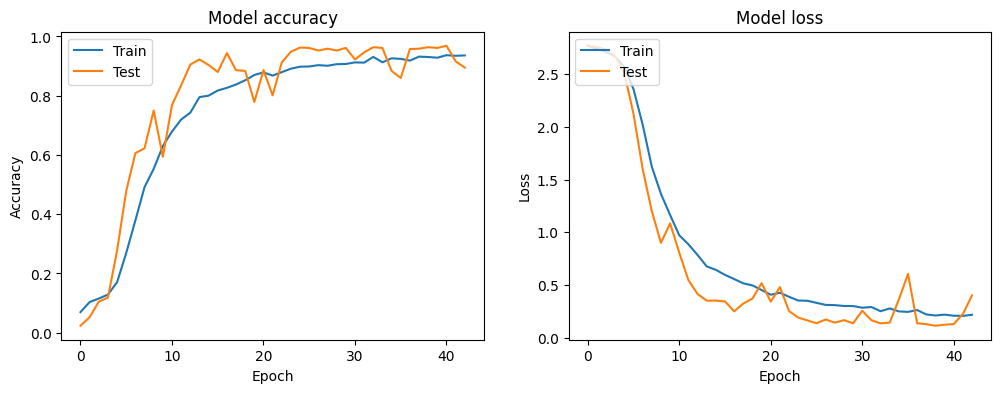

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


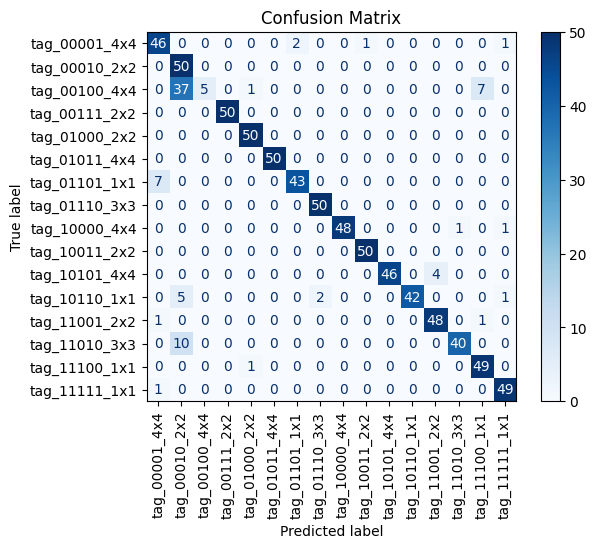

Exactitud del modelo: 89.50%
Tasa de errores: 10.50%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


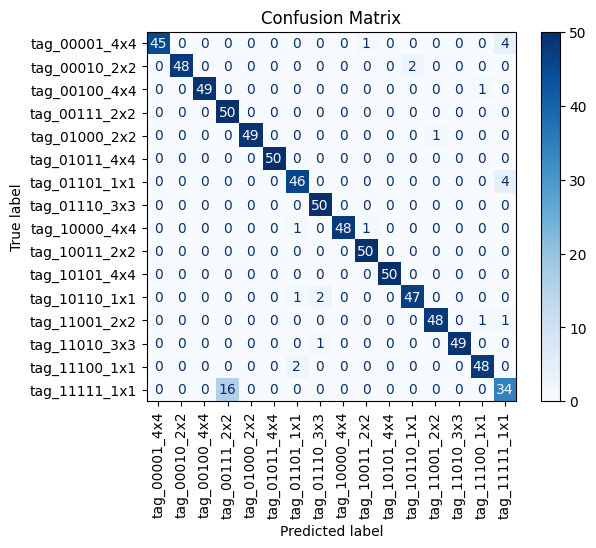

Exactitud del modelo: 95.12%
Tasa de errores: 4.87%


In [35]:
import tensorflow as tf
from functools import partial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model_classifier_interval = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model_classifier_interval.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model_classifier_interval.fit(aut_filtered_x_out_1601_050_080, aut_filtered_label_050_080, epochs=100, 
                    validation_data=(aut_filtered_x_out_1601_050_080_test, aut_filtered_label_050_080_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model_classifier_interval.predict(aut_filtered_x_out_1601_050_080_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_050_080_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix
y_pred = model.predict(aut_filtered_x_out_1601_050_080_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_050_080_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.1385 - loss: 2.8407 - val_accuracy: 0.5437 - val_loss: 1.9045
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.4314 - loss: 1.8191 - val_accuracy: 0.7000 - val_loss: 1.0273
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 119ms/step - accuracy: 0.6558 - loss: 1.1138 - val_accuracy: 0.7700 - val_loss: 0.6833
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 120ms/step - accuracy: 0.7451 - loss: 0.8048 - val_accuracy: 0.7987 - val_loss: 0.5838
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.8209 - loss: 0.6299 - val_accuracy: 0.9025 - val_loss: 0.4173
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 16s 118ms/step - accuracy: 0.8452 - loss: 0.5120 - val_accuracy: 0.9038 - val_loss: 0.3861
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 123ms/step - accuracy: 0.8756 - loss: 0.4276 - val_accuracy: 0.9212 - val_loss: 0.3448
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 17s 125ms/step - accuracy: 0.8918 -

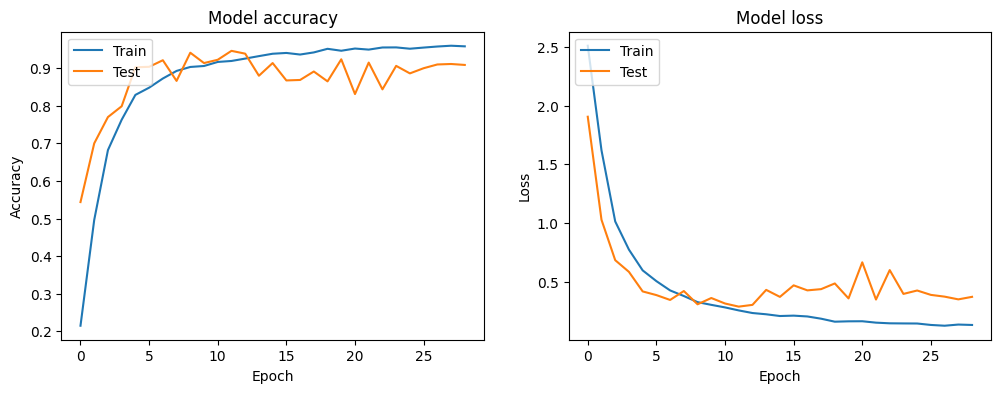

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


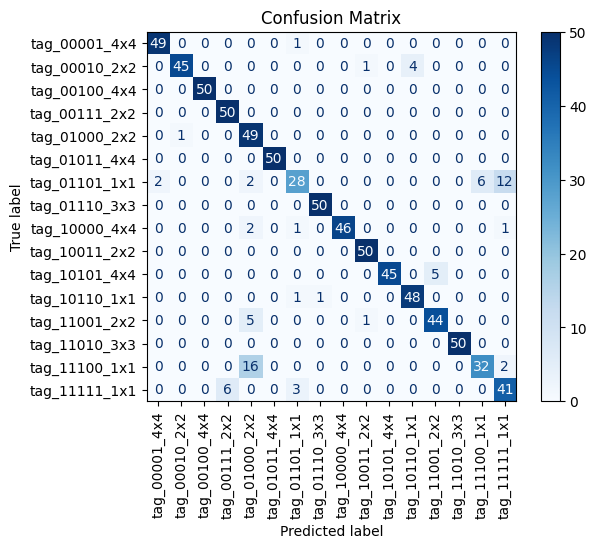

Exactitud del modelo: 90.88%
Tasa de errores: 9.13%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


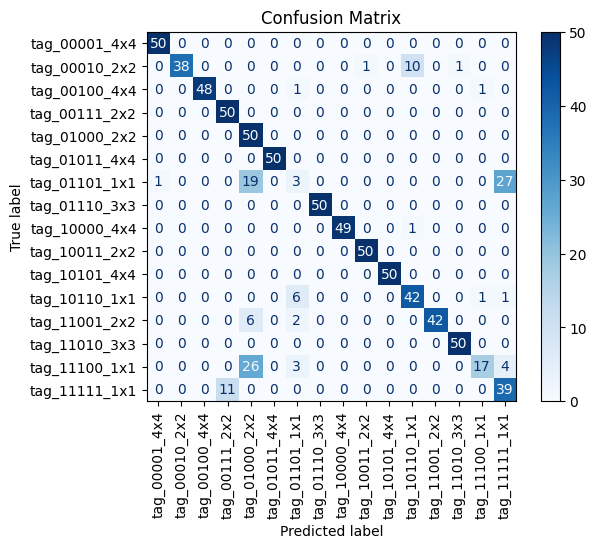

Exactitud del modelo: 84.75%
Tasa de errores: 15.25%


In [33]:
import tensorflow as tf
from functools import partial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model_classifier_interval = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model_classifier_interval.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model_classifier_interval.fit(aut_filtered_x_out_1601_080_110, aut_filtered_label_080_110, epochs=100, 
                    validation_data=(aut_filtered_x_out_1601_080_110_test, aut_filtered_label_080_110_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model_classifier_interval.predict(aut_filtered_x_out_1601_080_110_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_080_110_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix
y_pred = model.predict(aut_filtered_x_out_1601_080_110_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_080_110_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

c:\Users\TSE LATAM\.conda\envs\reto\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.0950 - loss: 2.7398 - val_accuracy: 0.0512 - val_loss: 2.7079
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.1637 - loss: 2.6004 - val_accuracy: 0.2825 - val_loss: 2.5218
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 112ms/step - accuracy: 0.2832 - loss: 2.3740 - val_accuracy: 0.4200 - val_loss: 2.1394
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 111ms/step - accuracy: 0.4092 - loss: 1.9543 - val_accuracy: 0.5462 - val_loss: 1.6424
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.5483 - loss: 1.5061 - val_accuracy: 0.6050 - val_loss: 1.3563
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 117ms/step - accuracy: 0.6222 - loss: 1.2052 - val_accuracy: 0.6712 - val_loss: 1.1755
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.6686 - loss: 1.0209 - val_accuracy: 0.6988 - val_loss: 1.1356
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - accuracy: 0.7064 - loss: 0.9277 - 

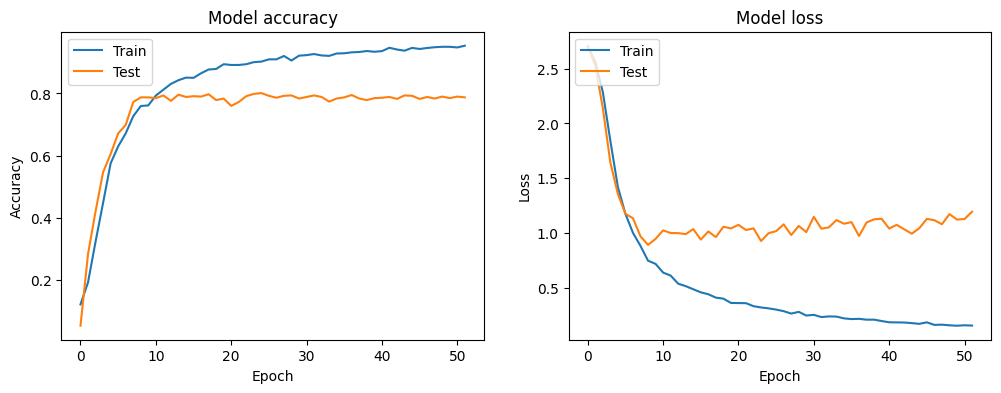

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


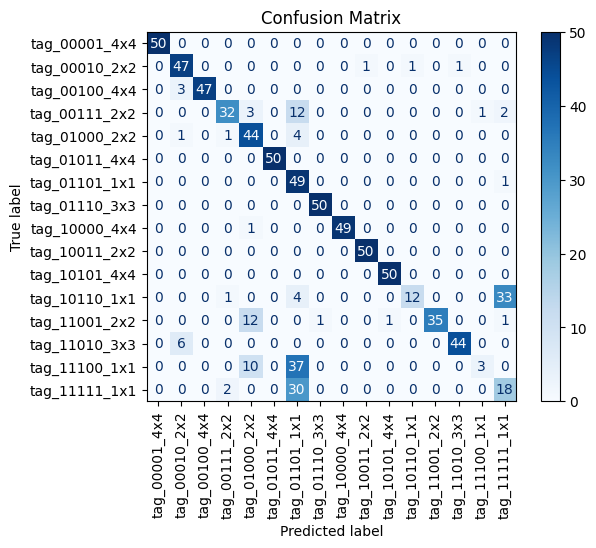

Exactitud del modelo: 78.75%
Tasa de errores: 21.25%
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


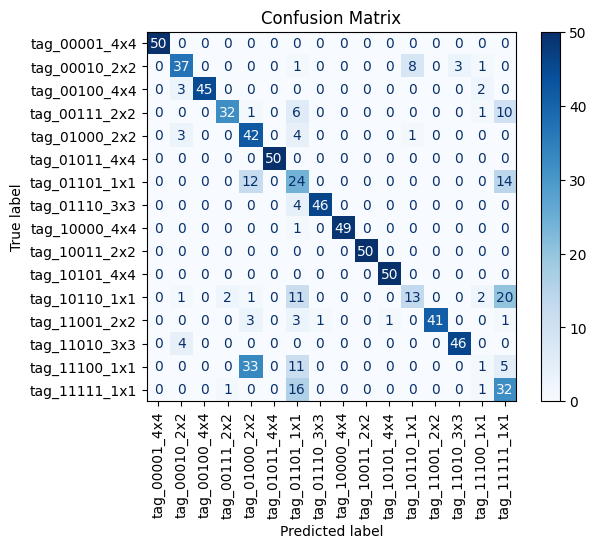

Exactitud del modelo: 76.00%
Tasa de errores: 24.00%


In [34]:
import tensorflow as tf
from functools import partial
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


DefaultConv2D = partial(
    tf.keras.layers.Conv2D,
    kernel_size=5,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)

model_classifier_interval = tf.keras.Sequential([
    DefaultConv2D(filters=2, input_shape=(1600, 128, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    DefaultConv2D(filters=4),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=8),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=16, activation='softmax')
])

callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', min_delta=0.01, patience=10)

model_classifier_interval.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

# Train the model
history = model_classifier_interval.fit(aut_filtered_x_out_1601_110_140, aut_filtered_label_110_140, epochs=100, 
                    validation_data=(aut_filtered_x_out_1601_110_140_test, aut_filtered_label_110_140_test), callbacks=[callback])


# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Generate predictions and plot confusion matrix
y_pred = model_classifier_interval.predict(aut_filtered_x_out_1601_110_140_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_110_140_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")

# Generate the second predictions and plot confusion matrix
y_pred = model.predict(aut_filtered_x_out_1601_110_140_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(aut_filtered_label_110_140_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.title('Confusion Matrix')
plt.show()

# Calcula y muestra la exactitud y la tasa de errores
accuracy = np.trace(cm) / np.sum(cm)
print(f"Exactitud del modelo: {accuracy * 100:.2f}%")
error_rate = 1 - accuracy
print(f"Tasa de errores: {error_rate * 100:.2f}%")